In [2]:
import numpy as np
import pandas as pd

calls_data = pd.read_csv('./csv/final_calls.csv', usecols=['user', 'duration', 'time_normalized'])
# duration_std = calls_data.duration.std()
# duration_mean = calls_data.duration.mean()
# calls_data.duration = (calls_data.duration-duration_mean)/duration_std
# time_std = calls_data.time_normalized.std()
# time_mean = calls_data.time_normalized.mean()
# calls_data.time_normalized = (calls_data.time_normalized-time_mean)/time_std
# df = calls_data.groupby(['user']).mean()#means
# df2 = calls_data.groupby(['user']).std()#stdeviations
# M1 = calls_data['duration'].mean()
# V1 = calls_data['duration'].std()
# M2 = calls_data['time_normalized'].mean()
# V2 = calls_data['time_normalized'].std()

In [82]:
print(duration_mean, duration_std, time_mean, time_std)

59.91548754229468 246.8553004218603 6487197.912719163 3787790.82683246


In [99]:
##previous version of users generation code

# i,k = 0, 0
# for x,y in df.values:
#     #print(x,y, df2.unstack()[i], df2.unstack()[27+i])
#     s1 = np.abs(np.random.normal(x, df2.unstack()[i], 27))
#     s2 = np.abs(np.random.normal(y,df2.unstack()[20+i], 27))
#     i+=1
#     for c,v in zip(s1,s2):
#         k+=1
#         calls = np.abs(np.random.normal(482, 561, 1))
#         calls = np.int(np.floor(calls[0]))
#         Duration = np.abs(np.random.normal(c, df2.unstack()[i], calls))
#         Time = np.abs(np.random.normal(v, df2.unstack()[20+i], calls))
#         new_df = pd.DataFrame({'user':[k]*calls, 'duration':Duration, 'time_normalized':Time})
#         calls_data = pd.concat([calls_data, new_df], axis=0)

In [121]:
calls_data = calls_data[calls_data['time_normalized']<=1]
calls_data = calls_data.reset_index()
del calls_data['index']
calls_data.to_csv("new_calls_data.csv", index=False)

1. does normalization has an effect on MLE estimation of parameters.(It tends to decrease the variance in the distribution.)
2. combning two gaussian distributions: mean = (n1*M1+n2*M2)/(n1+n2), 
                                       variance = {(V1^2+M1^2)*n1+(V2^2+M2^2)*n2}/(n1+n2) - mean^2

In [84]:
###---------------------new users generation------------------##

users_mean =[]
users_var = []
users = calls_data['user'].unique()
user_n = []
for user in users:
    print(user)
    m = [calls_data[calls_data['user']== user]['duration'].mean(), calls_data[calls_data['user']== user]['time_normalized'].mean()]
    users_mean.append(m)
    ind = calls_data[calls_data['user']==user].index.values
    cov = np.zeros((2,2))
    for k in ind:
        cov += np.outer((calls_data.loc[k][1:].values-m),np.transpose(calls_data.loc[k][1:].values-m))
    cov/=len(ind)
    users_var.append(cov)
    user_n.append(len(ind))

7122915122
7651896055
7195393761
7408255044
7110730864
7784425582
7607124303
7166594208
7197268544
7806391587
7981267897
7640835719
7817341678
7102745960
7389444649
7839321359
7456622368
7641036117
7690700998
7163185791
7304637408
7375968743
7541486388
7946912731
7610039694
7086312446
7681546436


In [85]:
## new version of users generation code

new_users_mean = []
new_users_var = []
new_users_id = []
num_calls = []
k=1
for i in range(len(users)):
    for j in range(i+1, len(users)):
        print('user: ',k)
        new_users_id.append(k)
        k+=1
        a = np.multiply(user_n[i], users_mean[i])
        b = np.multiply(user_n[j], users_mean[j])
        m = (a+b)/(user_n[i]+user_n[j])
        cov = ((np.multiply(user_n[i],a)+np.multiply(user_n[j],b)+np.outer((a+b), np.transpose(a+b)))/((user_n[i]+user_n[j])*(user_n[i]+user_n[j]))) - np.outer(m,np.transpose(m))
        new_users_var.append(cov)
        new_users_mean.append(m)
        num_calls.append(np.floor((user_n[i]+user_n[j])/2))

user:  1
user:  2
user:  3
user:  4
user:  5
user:  6
user:  7
user:  8
user:  9
user:  10
user:  11
user:  12
user:  13
user:  14
user:  15
user:  16
user:  17
user:  18
user:  19
user:  20
user:  21
user:  22
user:  23
user:  24
user:  25
user:  26
user:  27
user:  28
user:  29
user:  30
user:  31
user:  32
user:  33
user:  34
user:  35
user:  36
user:  37
user:  38
user:  39
user:  40
user:  41
user:  42
user:  43
user:  44
user:  45
user:  46
user:  47
user:  48
user:  49
user:  50
user:  51
user:  52
user:  53
user:  54
user:  55
user:  56
user:  57
user:  58
user:  59
user:  60
user:  61
user:  62
user:  63
user:  64
user:  65
user:  66
user:  67
user:  68
user:  69
user:  70
user:  71
user:  72
user:  73
user:  74
user:  75
user:  76
user:  77
user:  78
user:  79
user:  80
user:  81
user:  82
user:  83
user:  84
user:  85
user:  86
user:  87
user:  88
user:  89
user:  90
user:  91
user:  92
user:  93
user:  94
user:  95
user:  96
user:  97
user:  98
user:  99
user:  100
user:  1

In [86]:
df = pd.DataFrame(columns=['user','duration','time_normalized'])
#df.append({'user':-1, 'duration':-1, 'time_normalized':-1})
for i in range(len(new_users_id)):
    print('user', i)
    d = np.random.multivariate_normal(new_users_mean[i], new_users_var[i], int(num_calls[i])).T
    id = [new_users_id[i]]*int(num_calls[i])
    df1 = pd.DataFrame({'user':id, 'duration':d[:][0], 'time_normalized':d[:][1]})
    df = df.append(df1, ignore_index=True)

user 0
user 1
user 2
user 3
user 4
user 5
user 6
user 7
user 8
user 9
user 10
user 11
user 12
user 13
user 14
user 15
user 16
user 17
user 18
user

C:\Users\manoj\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """


 19
user 20
user 21
user 22
user 23
user 24
user 25
user 26
user 27
user 28
user 29
user 30
user 31
user 32
user 33
user 34
user 35
user 36
user 37
user 38
user 39
user 40
user 41
user 42
user 43
user 44
user 45
user 46
user 47
user 48
user 49
user 50
user 51
user 52
user 53
user 54
user 55
user 56
user 57
user 58
user 59
user 60
user 61
user 62
user 63
user 64
user 65
user 66
user 67
user 68
user 69
user 70
user 71
user 72
user 73
user 74
user 75
user 76
user 77
user 78
user 79
user 80
user 81
user 82
user 83
user 84
user 85
user 86
user 87
user 88
user 89
user 90
user 91
user 92
user 93
user 94
user 95
user 96
user 97
user 98
user 99
user 100
user 101
user 102
user 103
user 104
user 105
user 106
user 107
user 108
user 109
user 110
user 111
user 112
user 113
user 114
user 115
user 116
user 117
user 118
user 119
user 120
user 121
user 122
user 123
user 124
user 125
user 126
user 127
user 128
user 129
user 130
user 131
user 132
user 133
user 134
user 135
user 136
user 137
user 138
user 

In [91]:
print(calls_data.duration.min(), calls_data.duration.max(), calls_data.time_normalized.min(), calls_data.time_normalized.max())

-0.24271501336978726 28.814793526012558 -1.6546602490086195 1.845430069095529


In [92]:
print(df.duration.min(), df.duration.max(), df.time_normalized.min(), df.time_normalized.max())

-2.178373420861596 3.3416285701885498 -5.599861750375791 4.278452219041232


In [93]:
df = df[df['time_normalized']>=calls_data.time_normalized.min()]
df = df[df['time_normalized']<=calls_data.time_normalized.max()]
df = df[df['duration']>=calls_data.duration.min()]
df = df[df['duration']<=calls_data.duration.max()]
df = df.append(calls_data, ignore_index=True)
df = df.sort_values(by = ['time_normalized'])
df = df.reset_index()
del df['index']
df.to_csv('./378calls_data.csv', index=False)
print(df.shape)

(153854, 3)


In [97]:
123000*0.9

110700.0

In [95]:
## collision rate calculation

import numpy as np
import pandas as pd

df = pd.read_csv('./csv/378calls_data_new.csv')
print(df['time_normalized'].max() - df['time_normalized'].min())

3.5000903181041485


In [3]:
df.time_normalized.max() - df.time_normalized.min()
df.head()
# df.duration*= calls_data.duration.max()  ##convert both columns to seconds
# df.time_normalized*= calls_data.time_normalized.max()

print(df.duration.max(), df.time_normalized.max())
df['call_ended'] = df['time_normalized']+df['duration']
df

7173.0 13477301.0


,user,duration,time_normalized,call_ended
0,197,0.694004,1.932191e+02,1.939131e+02
1,303,7.465735,4.377479e+02,4.452136e+02
2,286,0.309800,4.488519e+02,4.491617e+02
3,296,0.810458,8.337566e+02,8.345671e+02
4,88,10.832527,1.295490e+03,1.306322e+03
5,16,0.740615,2.001800e+03,2.002541e+03
6,261,0.096423,2.070467e+03,2.070563e+03
7,263,0.759185,2.172382e+03,2.173141e+03
8,301,0.012027,2.643076e+03,2.643088e+03
9,303,7.480833,2.889325e+03,2.896805e+03


In [4]:
bins = 5000
interval = (df.time_normalized.max()-df.time_normalized.min())/bins
start = df.time_normalized.min()
s1,s2 = [], []
a = start
for i in range(bins):
    s1.append(a)
    s2.append(a+interval)
    a+=interval
rb_requests=[]
for i in range(bins):
    df1 = df[df['time_normalized']>=s1[i]]
    df1 = df1[df1['call_ended']<=s2[i]]
    rb_requests.append(df1.shape[0])
rb = pd.DataFrame(rb_requests, columns=['rb_req'])
rb.rb_req.value_counts()
interval

2695.4215561778324

time_normalized column is treated as starting time when a call is started, call_ended is when the call is ended.

number of preambles=10
time interval = 2695.42 seconds

In [44]:
##generate data for collision detection

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import pickle as pkl

test_data = df[72000:]    #(validation + test)
print(test_data.shape)

class RNN_v1(nn.Module):
    def __init__(self, batch_size, n_steps, input_size, output_size, hidden_size, softmax):
        super(RNN_v1, self).__init__()
        self.bs = batch_size
        self.n_steps = n_steps
        self.h_neurons = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        self.rnn = nn.RNN(input_size = self.input_size, hidden_size = self.h_neurons, num_layers = 1, batch_first=True, 
                          nonlinearity = 'tanh', dropout = 0, bias = True)
        self.final_layer = nn.Linear(self.h_neurons, 380)   ##378 users+ duration + time normalized column
        torch.nn.init.xavier_uniform_(self.final_layer.weight)
        self.softmax = softmax
        
    def forward(self, X):
        h0 = torch.zeros(1, self.bs, self.h_neurons).to(dev)
        X, hn = self.rnn(X, h0)
        X = self.final_layer(X)
        f = torch.zeros(1,100)
        for i in range(self.bs):
            if i==0:
                f = X[i][-1].view(1,-1)
            else:
                f = torch.cat((f, X[i][-1].view(1,-1)), dim=0)
        return f

def preproc_input(bs, k, dataset):
    i = 0
    if dataset == 'train':
        y = train_data[k+1:k+bs+1]
    elif dataset == 'valid':
        y = validation_data[k+1:k+bs+1]
    elif dataset == 'test':
        y = test_data[k+1:k+bs+1]
    x = torch.zeros(1,10,380)
    #print('reached here')
    while i< bs:
        if i==0:
            if dataset == 'train':
                x = train_data[i+k:(i+k+10)].view(1,10,-1)
            elif dataset == 'valid':
                x = validation_data[i+k:(i+k+10)].view(1,10,-1)
            elif dataset == 'test':
                x = test_data[i+k:(i+k+10)].view(1,10,-1)
        else:
            if dataset == 'train':
                x = torch.cat((x, train_data[i+k:(i+k+10)].view(1,10,-1)), dim=0)
            elif dataset == 'valid':
                x = torch.cat((x, validation_data[i+k:(i+k+10)].view(1,10,-1)), dim=0)
            elif dataset == 'test':
                x = torch.cat((x, test_data[i+k:(i+k+10)].view(1,10,-1)), dim=0)
        i+=1
        #print('error')
        #print("dataset: ",dataset, i+k, i+k+10, " i ",i, " k ",k)
    return x.to(dev),y.to(dev)

def calc_accuracy(x, y):
    predicted = np.argmax(x.detach().cpu().index_select(1, torch.LongTensor(z)), axis=1)
    true_labels = np.argmax(y.cpu().index_select(1, torch.LongTensor(z)), axis=1)
    #print(predicted, true_labels)
    accuracy = torch.sum(torch.eq(predicted, true_labels))/predicted.shape[0]
    return accuracy.item()

rnn = torch.load('./results/rnn_new100.pkl')

def test(rnn, test_data, bs):
    rnn.eval()
    with torch.no_grad():
        v_ind,test_loss, test_accuracy = 0,0,0
        while(v_ind<= test_data.shape[0]-2*bs):
            x,y = preproc_input(bs, v_ind, 'test')
            v_ind+=20
            v_pred = rnn(x.float())
            v_loss = loss_func(v_pred, y)
            test_loss+=v_loss.item()
            test_accuracy+= calc_accuracy(v_pred,y)
        test_loss/=(v_ind/20)
        test_accuracy/=(v_ind/20)
        print( "test_loss:", test_loss, " test_accuracy:", test_accuracy)

(20942, 4)


In [220]:
import pandas as pd
predictions = pd.read_csv('./results/lstm models/rnn_prediction_80.csv')
true_data = pd.read_csv('./results/lstm models/rnn_true_labels.csv')
# predictions.duration*=calls_data.duration.max()
# predictions.time_normalized*=calls_data.time_normalized.max()
# true_data.duration*=calls_data.duration.max()
# true_data.time_normalized*=calls_data.time_normalized.max()
# predictions['call_ended']= predictions['time_normalized']+predictions['duration']
# true_data['call_ended']= true_data['time_normalized']+true_data['duration']
print(predictions.time_normalized.max(), predictions.time_normalized.min())
print(true_data.time_normalized.max(), true_data.time_normalized.min())

0.7325764 0.6159325
0.9997769173581292 0.7641022701907612


In [222]:
true_data['time_normalized']

0        0.764102
1        0.764104
2        0.764104
3        0.764109
4        0.764116
5        0.764134
6        0.764175
7        0.764193
8        0.764203
9        0.764204
10       0.764227
11       0.764239
12       0.764264
13       0.764264
14       0.764283
15       0.764288
16       0.764301
17       0.764313
18       0.764314
19       0.764319
20       0.764322
21       0.764344
22       0.764362
23       0.764365
24       0.764390
25       0.764411
26       0.764412
27       0.764423
28       0.764435
29       0.764453
           ...   
20890    0.999334
20891    0.999336
20892    0.999361
20893    0.999380
20894    0.999389
20895    0.999398
20896    0.999416
20897    0.999422
20898    0.999439
20899    0.999444
20900    0.999479
20901    0.999499
20902    0.999502
20903    0.999515
20904    0.999516
20905    0.999540
20906    0.999542
20907    0.999557
20908    0.999574
20909    0.999576
20910    0.999579
20911    0.999594
20912    0.999678
20913    0.999684
20914    0

In [56]:
count=0
for i in range(predictions.shape[0]):
    p = np.count_nonzero(s1<predictions.loc[i].time_normalized)
    q = np.count_nonzero(s1<true_data.loc[i].time_normalized)
    if p==q:
        count+=1
        
print(count)

29920


In [55]:
k = (-predictions.time_normalized+true_data.time_normalized)
predictions.time_normalized+=k


In [3]:
predictions.shape

(30820, 3)

In [3]:
import numpy as np
i=0
while (i<=30800):
    print(np.count_nonzero(predictions.loc[i:i+100].user_id==true_data.loc[i:i+100].user_id))
    i+=100

99
99
101
99
97
100
100
99
101
98
96
100
99
99
99
99
99
97
101
100
101
100
98
100
101
101
101
99
101
100
100
99
98
100
101
99
101
100
101
99
99
100
101
100
99
100
99
99
100
101
98
100
100
99
98
98
100
98
101
98
100
100
101
99
100
100
95
101
98
100
99
99
98
99
101
99
98
99
100
101
99
101
99
101
99
100
101
99
98
98
97
99
100
101
101
99
99
100
101
100
99
100
101
99
100
98
101
99
99
100
100
100
99
99
100
98
99
100
98
99
99
99
97
100
99
100
100
100
99
98
99
100
98
100
101
98
98
96
97
97
93
99
98
100
98
99
99
101
100
98
98
99
95
100
99
100
99
99
98
99
98
99
100
100
99
100
98
95
90
98
97
99
100
96
100
98
100
99
99
94
99
96
97
99
99
98
95
95
96
99
97
99
101
100
93
96
95
100
99
100
100
97
98
100
97
93
97
92
97
99
98
96
96
95
95
97
99
99
95
100
96
96
94
97
96
97
99
94
99
97
99
97
95
97
99
99
96
97
97
95
95
96
97
98
97
95
99
98
99
99
96
97
90
95
95
98
94
97
98
98
99
95
95
99
98
99
94
97
95
97
98
93
93
96
96
95
97
96
94
98
89
95
89
94
93
86
93
89
90
94
91
94
86
91
95
96
97
96
92
91
95
87
98
91
93


In [1]:
import matplotlib.pyplot as plt

[]

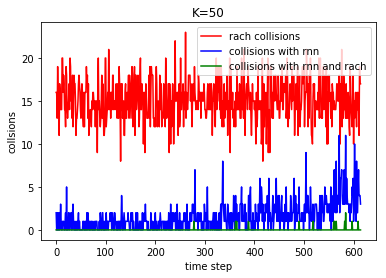

In [43]:
import numpy as np

ues = 50
pream = [10, 20, 30, 40, 50, 60,70,80, 90, 100]
avg_col = []
min_col = []
max_col = []
# for p in pream:
rach_collisions = []
rnn_collisions = []
rach_and_rnn_collisions = []
i=0
while i<(predictions.shape[0]-100):
    x = np.random.uniform(0,64,ues)
    x = [np.ceil(j) for j in x]
    y = np.unique(x, return_counts=True)
    z = [j-1 for j in y[1]]
    rach_collisions.append(np.sum(z))
    c = ues-np.count_nonzero(predictions.loc[i:i+ues-1].user_id==true_data.loc[i:i+ues-1].user_id)
    rnn_collisions.append(c)
    x1 = np.random.uniform(0,64,c)
    x1 = [np.ceil(j) for j in x1]
    y1 = np.unique(x1, return_counts=True)
    z1 = [j-1 for j in y1[1]]
    rach_and_rnn_collisions.append(np.sum(z1))
    i+=ues
#     avg_col.append(np.mean(rach_collisions))
#     min_col.append(np.min(rach_collisions))
#     max_col.append(np.max(rach_collisions))

timesteps = [k for k in range(int(i/ues))]
plt.plot(timesteps, rach_collisions, 'r-', label = 'rach collisions')
plt.plot(timesteps, rnn_collisions, 'b-', label = 'collisions with rnn ')
plt.plot(timesteps, rach_and_rnn_collisions, 'g-', label = 'collisions with rnn and rach')
plt.xlabel('time step')
plt.ylabel('collsions')
plt.title('K=50')
plt.legend()
plt.plot()

# plt.plot(pream, avg_col, 'r-', label='average collisions')
# plt.plot(pream, min_col, 'g-', label='minimum collisions')
# plt.plot(pream, max_col, 'b-', label='maximum collisions')
# plt.xlabel('number of preambles')
# plt.ylabel('number of collisions')
# plt.title('preambles vs collisions')
# plt.legend()
# plt.show()

In [25]:
# x = np.random.uniform(0,10,100)
# x = [np.ceil(j) for j in x]
# y = np.unique(x, return_counts=True)
# z = [j-1 for j in y[1]]
print(np.sum(z))

90


In [39]:
# import numpy as np
print(np.min(rach_collisions), np.mean(rach_collisions), np.max(rach_collisions))
print(np.min(rnn_collisions), np.mean(rnn_collisions), np.max(rnn_collisions))
print(np.min(rach_and_rnn_collisions), np.mean(rach_and_rnn_collisions), np.max(rach_and_rnn_collisions))

61 65.703125 72
0 3.8359375 17
0.0 0.140625 4.0


In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('./csv/378calls_data.csv')
print(df.head())
df.time_normalized*=calls_data.time_normalized.max()
df.head()

   user  duration  time_normalized
0   197  0.000097         0.000014
1   303  0.001041         0.000032
2   286  0.000043         0.000033
3   296  0.000113         0.000062
4    88  0.001510         0.000096


,user,duration,time_normalized
0,197,0.000097,193.219111
1,303,0.001041,437.747902
2,286,0.000043,448.851910
3,296,0.000113,833.756637
4,88,0.001510,1295.489911


In [58]:
df['month']=0
v = [2678399, 5443199, 8035199, 10799999]
for i in range(len(v)+1):
    if i==0:
        df1 = df[df['time_normalized']<=2678399]
        ind = df1.index
        df.loc[ind, 'month'] = 0
    elif i==len(v):
        df1 = df[df['time_normalized']>10799999]
        ind = df1.index
        df.loc[ind, 'month'] = 4
        df.loc[ind,'time_normalized']-=4*31*24*3600
    else:
        df1 = df[df['time_normalized']<=v[i]]
        df1 = df1[df1['time_normalized']>v[i-1]]
        ind = df1.index
        df.loc[ind, 'month'] = i
        df.loc[ind,'time_normalized']-=i*31*24*3600
#     print(ind)
#     for j in ind:
#         df.loc[j]['month'] = i 

In [59]:
df['date']=0
df['hour']=0
df['minute']=0
df['second']=0
for j in range(5):
    if i==0 or i==2:
        z = [x for x in range(1,31)]
    else:
        z = [x for x in range(1,32)]
    d1 = df[df['month']==j]
    for i in reversed(z):
        ind =  d1[d1['time_normalized']>=i*24*3600].index
        d1 = d1[d1['time_normalized']<i*24*3600]
        df.loc[ind,'date'] = i
        df.loc[ind,'time_normalized']-=i*24*3600

z = [x for x in range(24)]
d1=df
for i in reversed(z):
    ind =  d1[d1['time_normalized']>=i*3600].index
    d1 = d1[d1['time_normalized']<i*3600]
    df.loc[ind,'minute'] = i
    df.loc[ind,'time_normalized']-=i*3600

z = [x for x in range(60)]
d1=df
for i in reversed(z):
    ind =  d1[d1['time_normalized']>=i*60].index
    d1 = d1[d1['time_normalized']<i*60]
    df.loc[ind,'minute'] = i
    df.loc[ind,'time_normalized']-=i*60

In [88]:
# df['second'] = df['time_normalized'].apply(np.floor)
# del df['time_normalized']
# df['duration']*=calls_data.duration.max()
df.to_csv('./csv/378calls_time_data.csv', index=False)

In [90]:
# df1 = pd.read_csv('./csv/378calls_time_data.csv')
df1

,user,duration,month,date,hour,minute,second
0,197,0.694004,0,0,0,3,13.0
1,303,7.465735,0,0,0,7,17.0
2,286,0.309800,0,0,0,7,28.0
3,296,0.810458,0,0,0,13,53.0
4,88,10.832527,0,0,0,21,35.0
5,16,0.740615,0,0,0,33,21.0
6,261,0.096423,0,0,0,34,30.0
7,263,0.759185,0,0,0,36,12.0
8,301,0.012027,0,0,0,44,3.0
9,303,7.480833,0,0,0,48,9.0


In [92]:
df1.shape[0]*0.8

81553.6

In [79]:
import pandas as pd

cpu = pd.read_csv('./results/New folder/rnnLog_new_cpu.txt', sep = '[\t,]')
gpu = pd.read_csv('./results/New folder/rnnLog_new_gpu.txt', sep = '[\t,]')

C:\Users\manoj\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\manoj\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [80]:
gpu.columns

Index(['2020-05-05 09:37:09', '843 - epoch', ' train_loss', ' train_accuracy',
       ' validation_loss', ' validation_accuracy'],
      dtype='object')

In [81]:
cols = list(cpu.columns)
print(cols)
cpu_train_loss = cpu[cols[2]].loc[1:]
cpu_train_accuracy = cpu[cols[3]].loc[1:]
cpu_valid_loss = cpu[cols[4]].loc[1:]
cpu_valid_accuracy = cpu[cols[5]].loc[1:]


['2020-05-05 04:57:48', '139 - epoch', ' train_loss', ' train_accuracy', ' validation_loss', ' validation_accuracy']


In [82]:
cols = list(gpu.columns)
print(cols)
gpu_train_loss = gpu[cols[2]].loc[1:]
gpu_train_accuracy = gpu[cols[3]].loc[1:]
gpu_valid_loss = gpu[cols[4]].loc[1:]
gpu_valid_accuracy = gpu[cols[5]].loc[1:]

['2020-05-05 09:37:09', '843 - epoch', ' train_loss', ' train_accuracy', ' validation_loss', ' validation_accuracy']


In [83]:
# epochs = [x for x in range(100)]
gpu_train_loss.max()

1.36391

[]

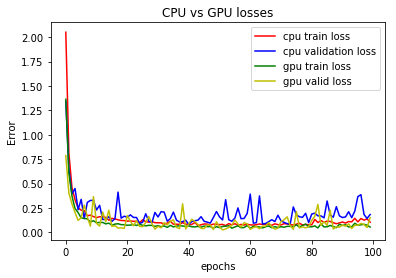

In [85]:
import matplotlib.pyplot as plt

plt.plot(epochs, cpu_train_loss, 'r-', label = 'cpu train loss')
plt.plot(epochs, cpu_valid_loss, 'b-', label = 'cpu validation loss')
plt.plot(epochs, gpu_train_loss, 'g-', label = 'gpu train loss')
plt.plot(epochs, gpu_valid_loss, 'y-', label = 'gpu valid loss')
plt.title('CPU vs GPU losses')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend()
plt.plot()

[]

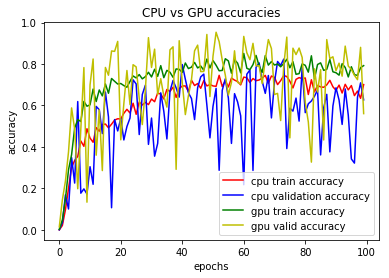

In [86]:
plt.plot(epochs, cpu_train_accuracy, 'r-', label = 'cpu train accuracy')
plt.plot(epochs, cpu_valid_accuracy, 'b-', label = 'cpu validation accuracy')
plt.plot(epochs, gpu_train_accuracy, 'g-', label = 'gpu train accuracy')
plt.plot(epochs, gpu_valid_accuracy, 'y-', label = 'gpu valid accuracy')
plt.title('CPU vs GPU accuracies')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.plot()

In [87]:
fnn = pd.read_csv('./results/New folder/fnnLog_new.txt', sep = '[\t,]')

C:\Users\manoj\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [88]:
cols = list(fnn.columns)
print(cols)
fnn_train_loss = fnn[cols[2]].loc[1:]
fnn_train_accuracy = fnn[cols[3]].loc[1:]
fnn_valid_loss = fnn[cols[4]].loc[1:]
fnn_valid_accuracy = fnn[cols[5]].loc[1:]

['2020-05-21 06:17:27', '646 - epoch', ' train_loss', ' train_accuracy', ' validation_loss', ' validation_accuracy']


[]

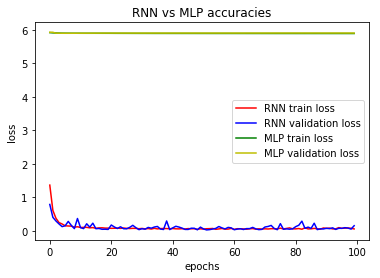

In [89]:
plt.plot(epochs, gpu_train_loss, 'r-', label = 'RNN train loss')
plt.plot(epochs, gpu_valid_loss, 'b-', label = 'RNN validation loss')
plt.plot(epochs, fnn_train_loss, 'g-', label = 'MLP train loss')
plt.plot(epochs, fnn_valid_loss, 'y-', label = 'MLP validation loss')
plt.title('RNN vs MLP accuracies')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.plot()

In [ ]:
## pseudo code RNN+RACH

for each time_interval:
    present_output = RNN(past_input)
    
    miss_predictions = []
    remaining_UEs = set(All_UEs)-set()
    

In [203]:
## number of requests prediction
import pandas as pd

df = pd.read_csv('./csv/378calls_data.csv')
df = df.sort_values(by='time_normalized')
df['interval'] = pd.cut(df.time_normalized, bins=1000)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(df['interval'])
df['interval_code'] = le.transform(df['interval'])

In [204]:
a = []
b = []
for i in df.index:
    a.append(df['interval'].loc[i].right)
    b.append(df['interval'].loc[i].left)

In [205]:
df['interval_right'] = a
df['interval_left'] = b
df.head()

,user,duration,time_normalized,interval,interval_code,interval_right,interval_left
0,197,0.000097,0.000014,"(-0.000986, 0.00101]",0,0.00101,-0.000986
1,303,0.001041,0.000032,"(-0.000986, 0.00101]",0,0.00101,-0.000986
2,286,0.000043,0.000033,"(-0.000986, 0.00101]",0,0.00101,-0.000986
3,296,0.000113,0.000062,"(-0.000986, 0.00101]",0,0.00101,-0.000986
4,88,0.001510,0.000096,"(-0.000986, 0.00101]",0,0.00101,-0.000986


In [130]:
df['interval_right'] = [x.right for x in df['interval']]

AttributeError: 'float' object has no attribute 'right'

In [20]:
# df['interval'].value_counts()
X_reg = df['interval_code']

In [173]:
# df['interval_code'].value_counts(sort=False)
import numpy as np
data = np.unique(df['interval_right'], return_counts=True)

In [156]:
reg_data = pd.DataFrame({'X': data[0], 'Y':data[1]})

In [44]:
import seaborn as sns

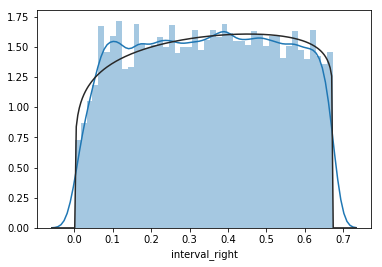

<Figure size 432x288 with 0 Axes>

In [212]:
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, gamma, chi2

sns.distplot(df['interval_right'].loc[0:72060], fit=beta);
fig = plt.figure()

In [210]:
# beta.fit(df['interval_right'])
print(beta.pdf(0.014,1.12669,1.16169), beta.pdf(0.014,1.15459,1.07454))
# df['interval_right']

0.7696705122078396 0.6450856871395874


In [211]:
# (1.126693212623601,
#  1.160082263119238,
#  0.0009364742946048942,
#  0.9994268971114442)
# (1.154591329181199,
#  1.075454137683007,
#  0.0009052992076563347,
#  0.6731758094041747)
beta.fit(df['interval_right'])

(1.126693212623601,
 1.160082263119238,
 0.0009364742946048942,
 0.9994268971114442)

In [160]:
from sklearn.linear_model import ridge_regression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [176]:
train = reg_data[0:673]
test = reg_data[673:]

In [80]:
np.asarray(train['X']).reshape(-1,1)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [181]:
reg = LinearRegression()
poly = PolynomialFeatures(10)
X = poly.fit_transform(np.asarray(train['X']).reshape(-1,1))
reg = reg.fit(X, train['Y'])
print(reg.score(X, train['Y']))
#print(reg.score(poly.fit_transform(np.asarray(test['X']).reshape(-1,1)), np.log(test['Y'])))

0.3337262172226433


In [183]:
reg.predict(poly.fit_transform([674]))

ValueError: Expected 2D array, got 1D array instead:
array=[674].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.